In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

from skimage import io
import tensorflow as tf
import PIL
os.chdir('/home/juanp.montoya/NeuralNetworks/Final_Project/input')

In [10]:
nRowsRead = 1000 
df1 = pd.read_csv('class_dict.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'class_dict.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7 rows and 4 columns


In [11]:
nRowsRead = 1000 
df2 = pd.read_csv('metadata.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'metadata.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


In [17]:
# PIL.Image.open('input/train/100694_sat.jpg')
df2.head(1)

,image_id,split,sat_image_path,mask_path
0,100694,train,train/100694_sat.jpg,train/100694_mask.png


# Option 3

In [34]:
def load_image(infilename, num_files) :
    data = np.zeros(([infilename[:num_files].shape[0], 2448, 2448, 3]))
    for i,j in enumerate(infilename[:num_files]):
        img = PIL.Image.open( j )
        img.load()
        data[i] = np.asarray( img, dtype="int32" )
    return data

In [37]:
train = load_image(df2.loc[df2['split'] == 'train', 'sat_image_path'], 50)

In [38]:
train.shape

(50, 2448, 2448, 3)

In [42]:
train = np.reshape(train, [50,3,2448,2448])

In [45]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

ValueError: Expected image array to have rank 3 (single image). Got array with shape: (2448, 2448)

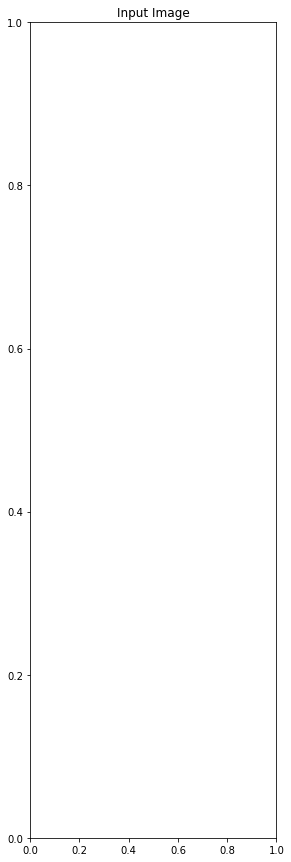

In [46]:
display(train[0,:,:,:])

# Option 1

In [52]:
def process_path(file_path, file_path_mask):
  # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)

    mask = tf.io.read_file(file_path_mask)
    mask = decode_img(mask)
    return img, mask
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [54]:
img_height = 2448
img_width = 2448
process_path(df2.loc[df2['split'] == 'train', 'sat_image_path'][0], df2.loc[df2['split'] == 'train', 'mask_path'][0])

(<tf.Tensor: shape=(2448, 2448, 3), dtype=float32, numpy=
 array([[[126., 109.,  79.],
         [127., 110.,  80.],
         [124., 107.,  77.],
         ...,
         [103.,  89.,  63.],
         [102.,  88.,  61.],
         [102.,  88.,  61.]],
 
        [[125., 108.,  78.],
         [124., 107.,  77.],
         [123., 106.,  76.],
         ...,
         [102.,  88.,  62.],
         [104.,  90.,  63.],
         [107.,  93.,  66.]],
 
        [[123., 106.,  76.],
         [123., 106.,  76.],
         [125., 108.,  78.],
         ...,
         [106.,  92.,  66.],
         [109.,  95.,  68.],
         [113.,  99.,  72.]],
 
        ...,
 
        [[154., 136.,  96.],
         [156., 138.,  98.],
         [153., 134.,  94.],
         ...,
         [154., 145., 102.],
         [147., 138.,  95.],
         [153., 144., 101.]],
 
        [[148., 130.,  92.],
         [150., 132.,  94.],
         [149., 131.,  93.],
         ...,
         [145., 137.,  91.],
         [133., 124.,  81.],
    

# Option 2

In [55]:
img_height = 2448
img_width = 2448
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'input/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NameError: name 'batch_size' is not defined